# Clothing Classification using TensorFlow

In [8]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Data Preprocessing

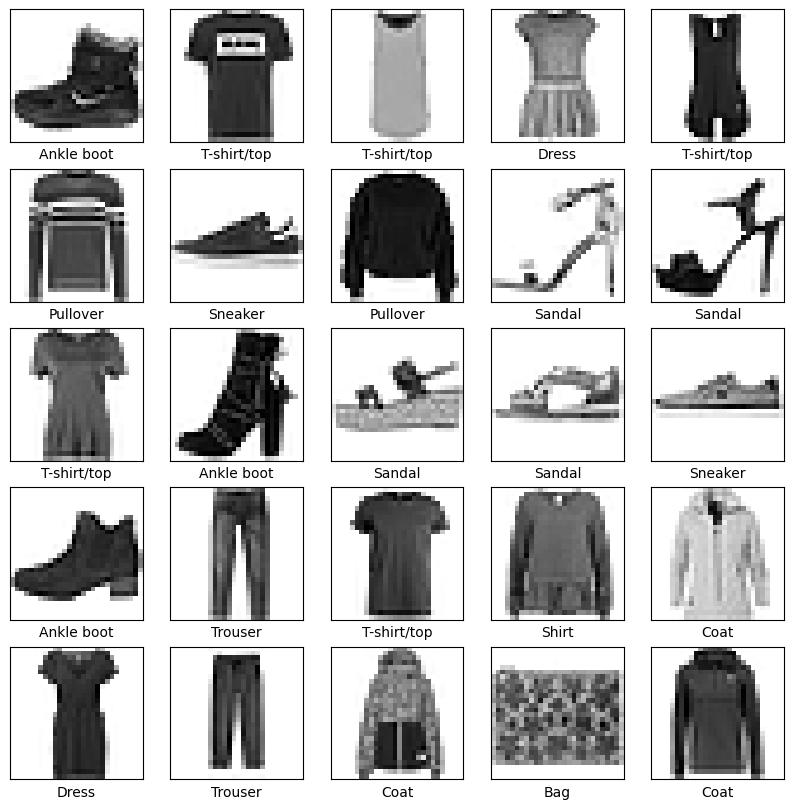

In [11]:
# Load the dataset from tensorflow
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the data from 0...255 to 0...1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Corrisponding class names 0...9
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# First 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



### Building the model

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Converts 28x28 pixel image to 1x784 used as the input layer
    tf.keras.layers.Dense(128, activation='relu'), # Hidden layer with 128 nodes
    tf.keras.layers.Dense(10) # Output layer with 10 nodes for each class
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 5s 2ms/step - loss: 0.4961 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3721 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3339 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3112 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2928 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2789 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2658 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9058
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2455 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2

### Evaluate and Predict

313/313 - 0s - loss: 0.3408 - accuracy: 0.8822 - 479ms/epoch - 2ms/step

Test accuracy: 0.8822000026702881
313/313 [==============================] - 1s 2ms/step


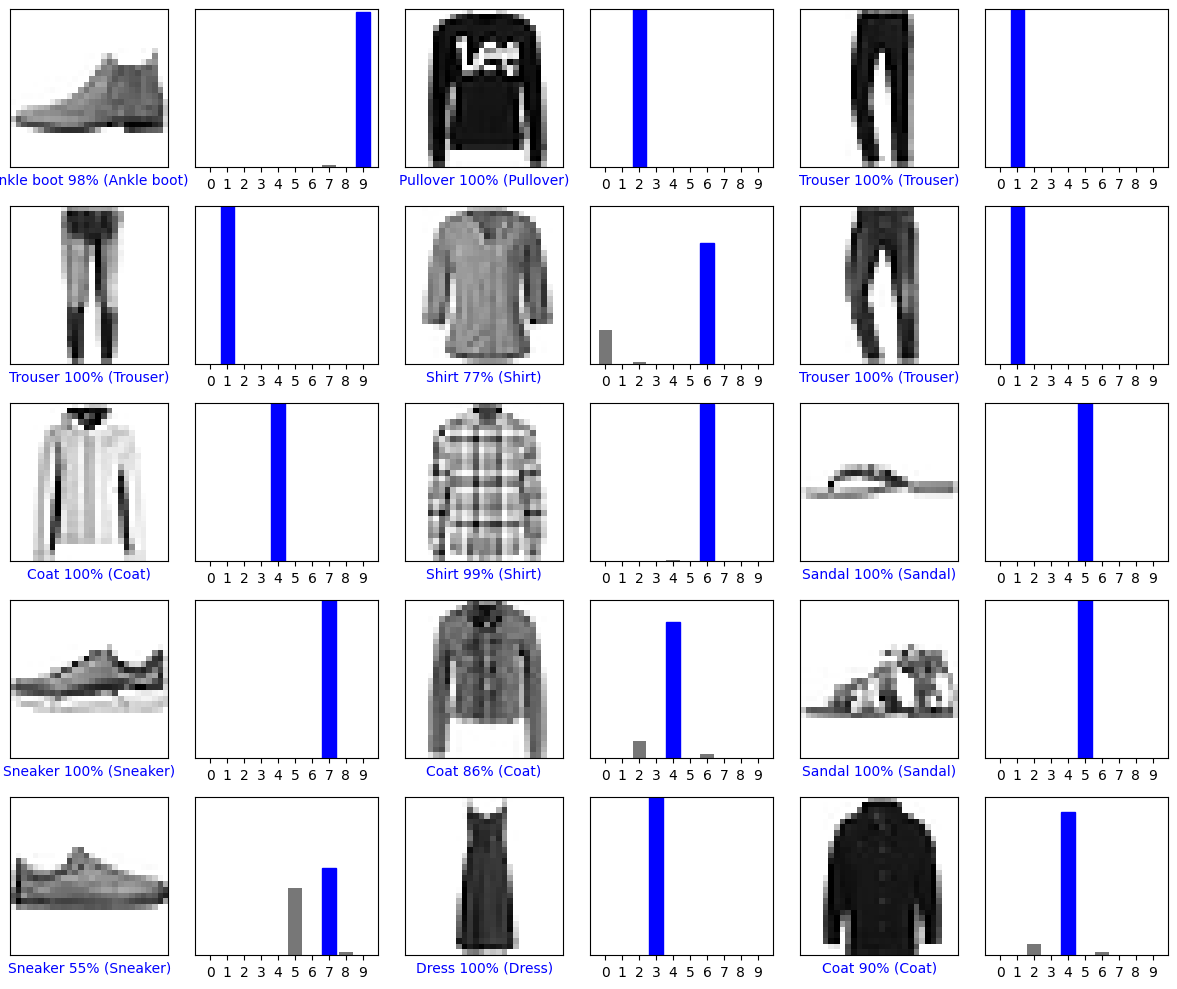

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model,  tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first 15 test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()